In [1]:
#--------------------------------------------------------------------------------------------------------
#Project:
#Image Classification with Convolutional Neural Network (CNN) using CIFAR-10 Dataset.


#Team Member:
#Name: Smit Rajeshkumar Patel
#Student ID: 030975566
#Email ID: SmitRajeshkumar.Patel01@student.csulb.edu


# MODEL 2
#--------------------------------------------------------------------------------------------------------

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Loading Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
# Dataset Overview
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])

print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
print("Number of training labels:", y_train.shape[0])
print("Number of testing labels:", y_test.shape[0])

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of testing samples: 10000
Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)
Number of training labels: 50000
Number of testing labels: 10000


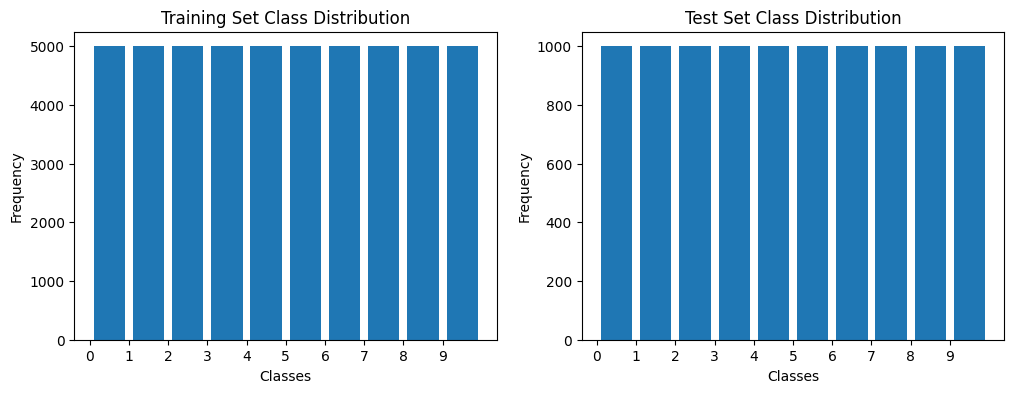

In [5]:
# Display class distribution in the training and test sets
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(y_train, bins=range(11), rwidth=0.8)
axs[0].set_title('Training Set Class Distribution')
axs[0].set_xticks(np.arange(10))
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Frequency')

axs[1].hist(y_test, bins=range(11), rwidth=0.8)
axs[1].set_title('Test Set Class Distribution')
axs[1].set_xticks(np.arange(10))
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Frequency')
plt.show()

In [6]:
# Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(x_train)

In [8]:
# Model Construction
model_2 = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [9]:
# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

In [10]:
# Model Summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                        

In [11]:
# Fit the model using the ImageDataGenerator
history = model_2.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=45,
                      validation_data=(x_test, y_test))

Epoch 1/45
782/782 [==============================] - 48s 48ms/step - loss: 1.9153 - accuracy: 0.3110 - precision: 0.4972 - recall: 0.0894 - val_loss: 1.7042 - val_accuracy: 0.3906 - val_precision: 0.6247 - val_recall: 0.1936
Epoch 2/45
782/782 [==============================] - 36s 46ms/step - loss: 1.5154 - accuracy: 0.4544 - precision: 0.6517 - recall: 0.2329 - val_loss: 1.3118 - val_accuracy: 0.5335 - val_precision: 0.6822 - val_recall: 0.3889
Epoch 3/45
782/782 [==============================] - 36s 46ms/step - loss: 1.3280 - accuracy: 0.5328 - precision: 0.7126 - recall: 0.3425 - val_loss: 1.0953 - val_accuracy: 0.5976 - val_precision: 0.7461 - val_recall: 0.4583
Epoch 4/45
782/782 [==============================] - 36s 46ms/step - loss: 1.1908 - accuracy: 0.5840 - precision: 0.7419 - recall: 0.4172 - val_loss: 1.1662 - val_accuracy: 0.6158 - val_precision: 0.7321 - val_recall: 0.5134
Epoch 5/45
782/782 [==============================] - 36s 46ms/step - loss: 1.1032 - accuracy: 0

In [12]:
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model_2.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

313/313 [==============================] - 1s 4ms/step - loss: 0.5236 - accuracy: 0.8243 - precision: 0.8675 - recall: 0.7906
Test Accuracy: 0.8242999911308289
Test Precision: 0.8674566745758057
Test Recall: 0.7906000018119812


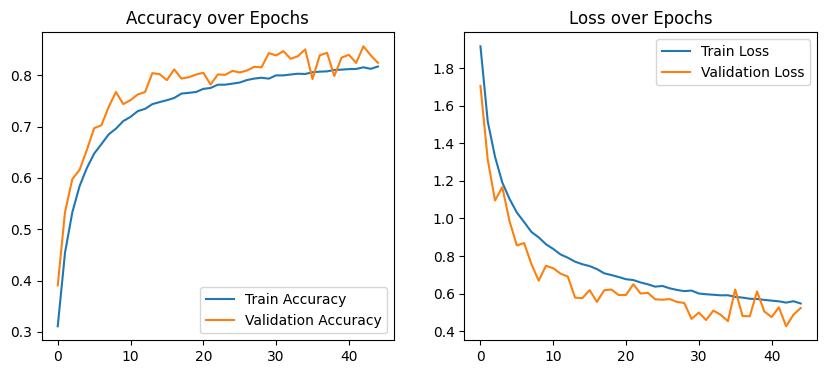

In [13]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [14]:
# Predictions for confusion matrix
y_pred = model_2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 2s 4ms/step


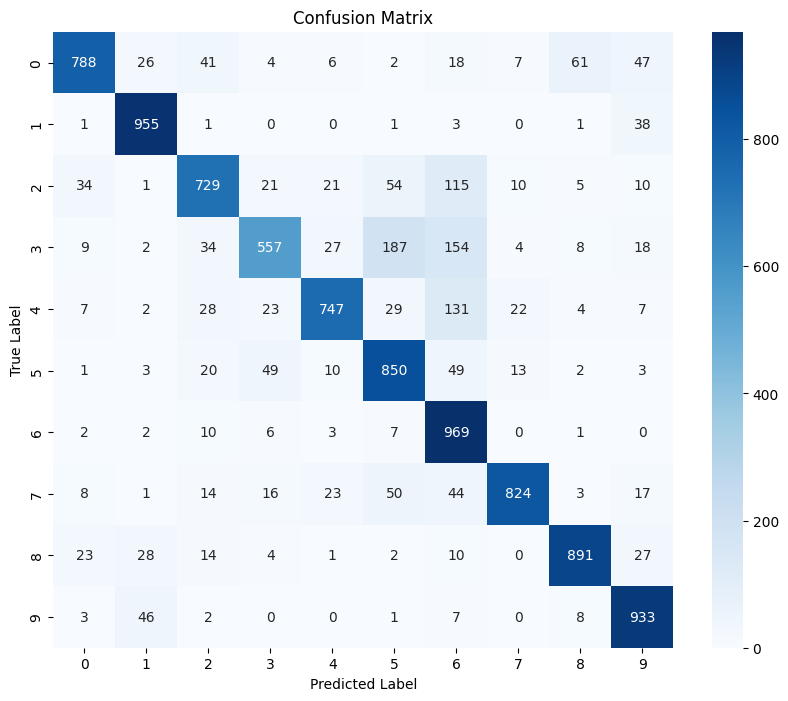

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()